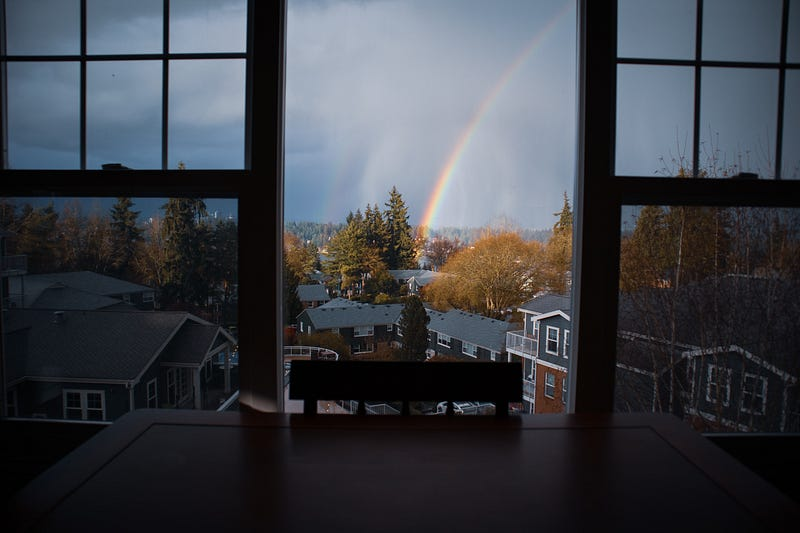

# King County Home Sales Linear Regression Analysis

**Authors:** Clara Giurgiu, Stephanie Ciaccia

## Overview
Panda Real Estate is a residential real estate firm that prioritizes leveraging technology to enhance and optimize their real estate portfolio. Historically operating in the greater New York City Area, Panda Real Estate has decided to expand it's portfolio to the west coast, to include properties in King County, Washington.

## Business Problem
As Panda Real Estate expands it's market to the greater Seattle Metropolitan area, we will be identifying the key variables that influence residential home prices in King County, Washington. By conducting a thorough exploration of the various variables that can impact home prices to ensure a comprehensive analysis of potential investment properties, we help inform investment teams on the residential housing market.

## Data Understanding
We have sourced data on home sales in king County, WA. One of our datasets was pulled from King County's official website and consists of data from 2021-2022 with over 30 thousands home attributes and selling prices. 
We also used a dataset from Fred Econimic Data to look at mortgage rates at the time of sale from King County dataset. 

In [1]:
# Import standard packages
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [26]:
# importing King County website data and looking at first 5 rows.
kc_data = pd.read_csv('../Data/kc_house_data.csv')
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.46,-122.19
1,8910500230,12/13/2021,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.71,-122.36
2,1180000275,9/29/2021,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.50,-122.23
3,1604601802,12/14/2021,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.57,-122.29
4,8562780790,8/24/2021,592500.00,2,2.00,1120,758,2.00,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.53,-122.07


In [27]:
# overview of dataframe
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

The data set contains slightly over 30,000 entries and 25 rows of information on home sales in King County, Washington, USA. 
15 out of the 25 columns are numeric and 10 contain string values. 
We can see that there are very few nulls in heat_source and sewer_system colums. 
The target column, price, does not have any nulls, is in the correct format (float) and ranges from \\$27K to $30M. 

In [28]:
# removing scientific notation, setting sig figs and looking at stats
pd.set_option('display.float_format', lambda x: '%.2f' % x)
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00
mean,4538103795.03,1108535.84,3.41,2.33,2112.42,16723.60,1.54,1809.83,476.04,330.21,217.41,1975.16,90.92,47.33,-121.32
std,2882587298.12,896385.66,0.98,0.89,974.04,60382.60,0.57,878.31,579.63,285.77,245.30,32.07,416.47,1.43,5.73
min,1000055.00,27360.00,0.00,0.00,3.00,402.00,1.00,2.00,0.00,0.00,0.00,1900.00,0.00,21.27,-157.79
25%,2064175145.00,648000.00,3.00,2.00,1420.00,4850.00,1.00,1180.00,0.00,0.00,40.00,1953.00,0.00,47.41,-122.33
50%,3874010800.00,860000.00,3.00,2.50,1920.00,7480.00,1.50,1560.00,0.00,400.00,150.00,1977.00,0.00,47.55,-122.23
75%,7287100141.00,1300000.00,4.00,3.00,2619.50,10579.00,2.00,2270.00,940.00,510.00,320.00,2003.00,0.00,47.67,-122.12
max,9904000012.00,30750000.00,13.00,10.50,15360.00,3253932.00,4.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,64.82,-70.07


The price column ranges from \\$27K to $30M, number of bedrooms ranges from 0 to 13, bathrooms from 0 to 10.5, which could be indicative of outliers.
The min sqft_living is 3 which seems odd for a home and could be an incorrect entry.

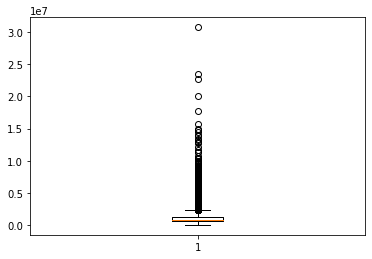

In [30]:
plt.boxplot(x='price',data=kc_data);


Our target variable is slightly right skewed. It does look like there is one data point that is vastly different from the rest and will be possibly removed for a more accurate analysis. 

In [31]:
# looking at more information on the outlier by filtering prices above 25M which is the maximun for most of the values
kc_data.loc[kc_data['price'] > 25000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
23470,5026900270,11/4/2021,30750000.00,1,3.50,2040,50705,2.00,YES,NO,...,PUBLIC,2000,410,0,890,1989,0,"1620 Lake Washington Boulevard, Seattle, Washi...",47.62,-122.28


In [32]:
kc_data.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

As seen above, only to columns have nulls, we will be dropping the rows as it will not significantly affect the 30K + dataset. 

## Data Preparation


In [33]:
# dropping null values, saving in place
kc_data = kc_data.dropna()
kc_data.shape

(30111, 25)

In [34]:
# sanity check
kc_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

After dropping null values, we still have a substantial amount of data to work with.

In [35]:
# converting date column to date time for analysis
kc_data['date'] = pd.to_datetime(kc_data['date'])
kc_data.describe(datetime_is_numeric=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,30111.00,30111,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00
mean,4539171422.40,2021-11-21 01:16:22.405101312,1108970.65,3.42,2.34,2113.34,16648.80,1.54,1810.39,476.62,330.48,217.45,1975.16,90.79,47.33,-121.32
min,1000055.00,2021-06-10 00:00:00,27360.00,0.00,0.00,3.00,402.00,1.00,2.00,0.00,0.00,0.00,1900.00,0.00,21.27,-157.79
25%,2070850032.50,2021-08-18 00:00:00,649236.00,3.00,2.00,1420.00,4850.00,1.00,1180.00,0.00,0.00,40.00,1953.00,0.00,47.41,-122.33
50%,3876000200.00,2021-11-03 00:00:00,860000.00,3.00,2.50,1920.00,7477.00,1.50,1560.00,0.00,400.00,150.00,1977.00,0.00,47.55,-122.23
75%,7287100141.00,2022-03-07 00:00:00,1300000.00,4.00,3.00,2620.00,10568.00,2.00,2270.00,940.00,510.00,320.00,2003.00,0.00,47.67,-122.12
max,9904000012.00,2022-06-09 00:00:00,30750000.00,13.00,10.50,15360.00,3253932.00,4.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,64.82,-70.07
std,2882235761.32,NaN,896515.83,0.98,0.89,973.45,59933.03,0.57,877.73,579.81,285.73,245.30,32.05,416.20,1.43,5.72


We are working with data from June 2021 to June 2022.

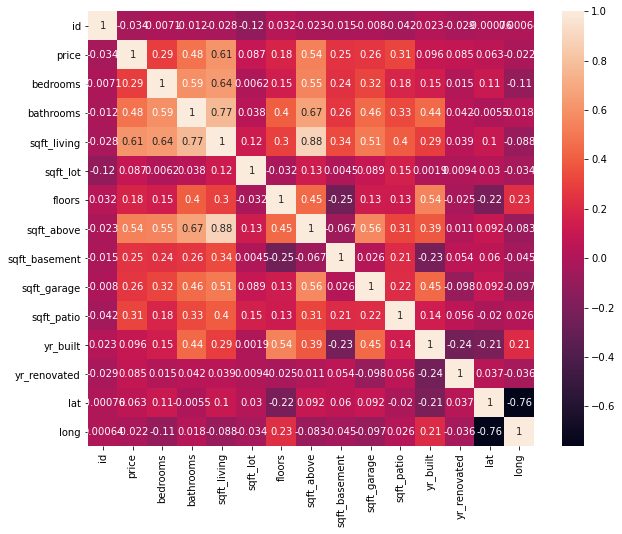

In [36]:
# looking at corr of numeric variables
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(kc_data.corr(), annot=True)
plt.show()

In [37]:
#saving for partner to use
stepth_analysis = kc_data
stepth_analysis.to_csv('../Data/steph.csv')

The strongest positive correlation with price is sqft_living, followed by sqft_above, bathrooms, sqft_patio and bedrooms.
The least correlated ones are yr_built, yr_renovated and lat & long.

Although small, we can see a positive trend between home square footage and prices.

In [41]:
# removing least correlated columns and ID column
kc_data = kc_data.drop(columns=['id','yr_built','yr_renovated', 'lat', 'long'])
kc_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,address
0,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,"2102 Southeast 21st Court, Renton, Washington ..."
1,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,"11231 Greenwood Avenue North, Seattle, Washing..."
2,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,"8504 South 113th Street, Seattle, Washington 9..."
3,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,"4079 Letitia Avenue South, Seattle, Washington..."
4,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,"2193 Northwest Talus Drive, Issaquah, Washingt..."


In [42]:
# firltering homes where price is less than $25M
kc_data = kc_data.loc[kc_data['price'] <= 25000000]
kc_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio
count,30110.00,30110.00,30110.00,30110.00,30110.00,30110.00,30110.00,30110.00,30110.00,30110.00
mean,1107986.23,3.42,2.34,2113.35,16647.67,1.54,1810.38,476.62,330.49,217.43
std,880105.69,0.98,0.89,973.47,59933.70,0.57,877.74,579.81,285.72,245.28
min,27360.00,0.00,0.00,3.00,402.00,1.00,2.00,0.00,0.00,0.00
25%,649118.00,3.00,2.00,1420.00,4850.00,1.00,1180.00,0.00,0.00,40.00
50%,860000.00,3.00,2.50,1920.00,7476.00,1.50,1560.00,0.00,400.00,150.00
75%,1300000.00,4.00,3.00,2620.00,10566.75,2.00,2270.00,940.00,510.00,320.00
max,23500000.00,13.00,10.50,15360.00,3253932.00,4.00,12660.00,8020.00,3580.00,4370.00


There is an incorrect entry based on the .describe() showing sqft_living of 3 and according to reasearch, it is listed on "Redfin.com" as 3,325 sqft. https://www.redfin.com/WA/Duvall/31072-NE-165th-St-98019/home/22591192. Several other entries followed the same pattern and we decided to remove entries with sqft_living less than 500.

In [43]:
kc_data = kc_data.loc[kc_data['sqft_living'] > 500]

In [44]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30039 entries, 0 to 30154
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           30039 non-null  datetime64[ns]
 1   price          30039 non-null  float64       
 2   bedrooms       30039 non-null  int64         
 3   bathrooms      30039 non-null  float64       
 4   sqft_living    30039 non-null  int64         
 5   sqft_lot       30039 non-null  int64         
 6   floors         30039 non-null  float64       
 7   waterfront     30039 non-null  object        
 8   greenbelt      30039 non-null  object        
 9   nuisance       30039 non-null  object        
 10  view           30039 non-null  object        
 11  condition      30039 non-null  object        
 12  grade          30039 non-null  object        
 13  heat_source    30039 non-null  object        
 14  sewer_system   30039 non-null  object        
 15  sqft_above     3003

In [45]:
# exploring string columns
kc_data.describe(include='object')

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address
count,30039,30039,30039,30039,30039,30039,30039,30039,30039
unique,2,2,2,5,5,12,7,4,29447
top,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,"Avenue, 108 Foothill Blvd, Rancho Cucamonga, C..."
freq,29537,29268,24807,26504,18469,11688,20561,25711,38


The waterfront, greenbelt, and nuisance columns seem to be boolean. Out of the 9 columns, we can separate the addresses to group by city or zip code.

In [46]:
kc_data['address'].value_counts()

Avenue, 108 Foothill Blvd, Rancho Cucamonga, California 91730, United States    38
Delridge Way Southwest, Seattle, Washington 98106, United States                24
9th Ave, Nebraska City, Nebraska 68410, United States                           21
South 35th Avenue, Bellevue, Nebraska 68123, United States                      20
A, Leadwood, Missouri 63653, United States                                      17
                                                                                ..
403 12th Street Southeast, Auburn, Washington 98002, United States               1
20422 Hollyhills Drive Northeast, Bothell, Washington 98011, United States       1
3023 Southwest Charlestown Street, Seattle, Washington 98126, United States      1
6704 Carleton Avenue South, Seattle, Washington 98108, United States             1
24714 119th Place Southeast, Kent, Washington 98030, United States               1
Name: address, Length: 29447, dtype: int64

Interestingly, it looks like there are entries for homes with addresses outside of Washington state. Will will filter out homes in WA only

In [73]:
# firltering homes that have "Washington" in the address
wa_only_df = kc_data[kc_data['address'].str.contains('Washington')]
wa_only_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29136 entries, 0 to 30154
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           29136 non-null  datetime64[ns]
 1   price          29136 non-null  float64       
 2   bedrooms       29136 non-null  int64         
 3   bathrooms      29136 non-null  float64       
 4   sqft_living    29136 non-null  int64         
 5   sqft_lot       29136 non-null  int64         
 6   floors         29136 non-null  float64       
 7   waterfront     29136 non-null  object        
 8   greenbelt      29136 non-null  object        
 9   nuisance       29136 non-null  object        
 10  view           29136 non-null  object        
 11  condition      29136 non-null  object        
 12  grade          29136 non-null  object        
 13  heat_source    29136 non-null  object        
 14  sewer_system   29136 non-null  object        
 15  sqft_above     2913

We now have 29,136 entries that are only in Washington state.

We also want to isolate cities and zipcodes.

In [74]:
# formatting to isolate by zipcode
wa_only_df = pd.concat([wa_only_df, wa_only_df['address'].str.split(',', expand=True)], axis=1)
wa_only_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,address,0,1,2,3,4,5
0,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,NO,...,0,0,40,"2102 Southeast 21st Court, Renton, Washington ...",2102 Southeast 21st Court,Renton,Washington 98055,United States,None,None
1,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,YES,...,1570,0,240,"11231 Greenwood Avenue North, Seattle, Washing...",11231 Greenwood Avenue North,Seattle,Washington 98133,United States,None,None
2,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,NO,...,1580,0,0,"8504 South 113th Street, Seattle, Washington 9...",8504 South 113th Street,Seattle,Washington 98178,United States,None,None
3,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,NO,...,1070,200,270,"4079 Letitia Avenue South, Seattle, Washington...",4079 Letitia Avenue South,Seattle,Washington 98118,United States,None,None
4,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,YES,...,550,550,30,"2193 Northwest Talus Drive, Issaquah, Washingt...",2193 Northwest Talus Drive,Issaquah,Washington 98027,United States,None,None


In [75]:
wa_only_df.drop(columns=['address',0,3,4,5], inplace=True)
wa_only_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,1,2
0,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,NO,...,Good,7 Average,Gas,PUBLIC,1180,0,0,40,Renton,Washington 98055
1,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,YES,...,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,Seattle,Washington 98133
2,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,NO,...,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,Seattle,Washington 98178
3,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,NO,...,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,Seattle,Washington 98118
4,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,YES,...,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,Issaquah,Washington 98027


In [76]:
wa_only_df.rename(columns={1:'city', 2:'state_zip'}, inplace=True)
wa_only_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,state_zip
0,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,NO,...,Good,7 Average,Gas,PUBLIC,1180,0,0,40,Renton,Washington 98055
1,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,YES,...,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,Seattle,Washington 98133
2,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,NO,...,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,Seattle,Washington 98178
3,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,NO,...,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,Seattle,Washington 98118
4,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,YES,...,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,Issaquah,Washington 98027


In [77]:
wa_only_df = pd.concat([wa_only_df, wa_only_df['state_zip'].str.split(' ', expand=True)], axis=1,)
wa_only_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,state_zip,0,1,2
0,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,NO,...,PUBLIC,1180,0,0,40,Renton,Washington 98055,,Washington,98055
1,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,YES,...,PUBLIC,1570,1570,0,240,Seattle,Washington 98133,,Washington,98133
2,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,NO,...,PUBLIC,1580,1580,0,0,Seattle,Washington 98178,,Washington,98178
3,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,NO,...,PUBLIC,1090,1070,200,270,Seattle,Washington 98118,,Washington,98118
4,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,YES,...,PUBLIC,1120,550,550,30,Issaquah,Washington 98027,,Washington,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,2021-11-30,1555000.00,5,2.00,1910,4000,1.50,NO,NO,NO,...,PUBLIC,1600,1130,0,210,Seattle,Washington 98103,,Washington,98103
30151,2021-06-16,1313000.00,3,2.00,2020,5800,2.00,NO,NO,NO,...,PUBLIC,2020,0,0,520,Seattle,Washington 98116,,Washington,98116
30152,2022-05-27,800000.00,3,2.00,1620,3600,1.00,NO,NO,YES,...,PUBLIC,940,920,240,110,Seattle,Washington 98122,,Washington,98122
30153,2022-02-24,775000.00,3,2.50,2570,2889,2.00,NO,NO,NO,...,PUBLIC,1830,740,480,100,Renton,Washington 98055,,Washington,98055


In [78]:
# Renaming zip column
wa_only_df.rename(columns={2:'zip_code'}, inplace=True)
wa_only_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,state_zip,0,1,zip_code
0,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,NO,...,PUBLIC,1180,0,0,40,Renton,Washington 98055,,Washington,98055
1,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,YES,...,PUBLIC,1570,1570,0,240,Seattle,Washington 98133,,Washington,98133
2,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,NO,...,PUBLIC,1580,1580,0,0,Seattle,Washington 98178,,Washington,98178
3,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,NO,...,PUBLIC,1090,1070,200,270,Seattle,Washington 98118,,Washington,98118
4,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,YES,...,PUBLIC,1120,550,550,30,Issaquah,Washington 98027,,Washington,98027


In [79]:
wa_only_df.drop(columns=['state_zip', 0,1], inplace=True)
wa_only_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,zip_code
0,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,NO,...,Good,7 Average,Gas,PUBLIC,1180,0,0,40,Renton,98055
1,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,YES,...,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,Seattle,98133
2,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,NO,...,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,Seattle,98178
3,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,NO,...,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,Seattle,98118
4,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,YES,...,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,Issaquah,98027


After formatting the address column to isolate by zipcode, we want to look into other columns that may not be useful in our analysis.

In [80]:
wa_only_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29136 entries, 0 to 30154
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           29136 non-null  datetime64[ns]
 1   price          29136 non-null  float64       
 2   bedrooms       29136 non-null  int64         
 3   bathrooms      29136 non-null  float64       
 4   sqft_living    29136 non-null  int64         
 5   sqft_lot       29136 non-null  int64         
 6   floors         29136 non-null  float64       
 7   waterfront     29136 non-null  object        
 8   greenbelt      29136 non-null  object        
 9   nuisance       29136 non-null  object        
 10  view           29136 non-null  object        
 11  condition      29136 non-null  object        
 12  grade          29136 non-null  object        
 13  heat_source    29136 non-null  object        
 14  sewer_system   29136 non-null  object        
 15  sqft_above     2913

After separating address column, there are 4 nulls in the new column, zip_code that will have to be removed. We will also check that the formating was done properly on the new columns.

In [81]:
wa_only_df['city'].unique()

array([' Renton', ' Seattle', ' Issaquah', ' Shoreline', ' Burien',
       ' Kent', ' Federal Way', ' Duvall', ' Auburn', ' Bellevue',
       ' Maple Valley', ' Woodinville', ' Redmond', ' Medina',
       ' Lake Forest Park', ' SeaTac', ' Clyde Hill', ' North Bend',
       ' Bothell', ' Kirkland', ' Des Moines', ' Newcastle',
       ' Mercer Island', ' Carnation', ' Sammamish', ' Snoqualmie',
       ' Enumclaw', ' Covington', ' Fall City', ' Normandy Park',
       ' Algona', ' Kenmore', ' Tukwila', ' Black Diamond', ' Pacific',
       ' Vashon', ' Hunts Point', ' Ravensdale', ' Dilworth',
       ' Beaux Arts', ' Preston', ' Skykomish', ' Milton', ' Monroe',
       ' Ames Lake', ' Yarrow Point', ' Snohomish', ' Lakeland North',
       ' Tulalip', ' Hobart', ' White Center', ' Washington',
       ' 35th Ave SW & SW Holden', ' Spanaway', ' Baring', ' Arlington',
       ' Eatonville', ' Puyallup', ' Vancouver', ' Spokane',
       ' Marysville', ' Union Hill-Novelty Hill', ' Clarkston',
   

We noticed that the city column values had a whitespace in front and there are a few that look like street addresses. 

In [82]:
# removing space in front of city name
wa_only_df['city'] = wa_only_df['city'].str.strip()

In [83]:
cities = wa_only_df['city'].unique()
print(sorted(cities))

['2301 NE Northlake Way', '35th Ave SW & SW Holden', 'Algona', 'Ames Lake', 'Arlington', 'Auburn', 'Baring', 'Beaux Arts', 'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation', 'Clarkston', 'Clyde Hill', 'Cottage Lake', 'Covington', 'Dash Point', 'Des Moines', 'Dilworth', 'Duvall', 'Eatonville', 'Enumclaw', 'Fairwood', 'Fall City', 'Federal Way', 'Hobart', 'Hunts Point', 'Issaquah', 'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Lakeland North', 'Maple Valley', 'Marysville', 'Medina', 'Mercer Island', 'Milton', 'Monroe', 'Newcastle', 'Normandy Park', 'North Bend', 'Pacific', 'Preston', 'Puyallup', 'Ravensdale', 'Redmond', 'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline', 'Skykomish', 'Snohomish', 'Snoqualmie', 'Snoqualmie Pass', 'Spanaway', 'Spokane', 'Tukwila', 'Tulalip', 'Union Hill-Novelty Hill', 'Vancouver', 'Vashon', 'Washington', 'White Center', 'Woodinville', 'Yarrow Point']


In [84]:
wa_only_df.loc[wa_only_df['city'] == '2301 NE Northlake Way']

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,zip_code
19560,2022-02-22,1205000.00,3,2.00,1400,1445,2.00,NO,NO,YES,...,Average,8 Good,Electricity,PUBLIC,1140,510,250,460,2301 NE Northlake Way,None


In [85]:
wa_only_df.loc[wa_only_df['city'] == '35th Ave SW & SW Holden']

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,zip_code
4818,2022-04-06,1180000.00,2,2.50,1260,700,2.00,NO,NO,YES,...,Average,9 Better,Electricity,PUBLIC,840,420,0,390,35th Ave SW & SW Holden,None
17496,2021-10-20,1200000.00,3,2.50,1310,1251,2.00,NO,NO,YES,...,Average,9 Better,Gas,PUBLIC,1100,390,180,520,35th Ave SW & SW Holden,None
26031,2022-01-25,1030000.00,3,2.50,1360,2227,2.00,NO,NO,YES,...,Average,9 Better,Gas,PUBLIC,960,400,0,400,35th Ave SW & SW Holden,None


After a quick search at the cities that have addresses one is a boat and 3 other entries point to a bus stop, we will remove these from out set.
Additionally, the cities list may reflect names of further jurisdiction within the cities. For example, 'Ames Lake' is located in the city of 'Carnation. This can potentially skew an analysis if looking into the cities. We will try to avoid that. 

In [86]:
# dropping rows with incorrect cities
# thought of replacing it but it might need more code
wa_only_df = wa_only_df.drop([19560,4818,17496,26031])

In [87]:
wa_only_df['zip_code'].unique()

array(['98055', '98133', '98178', '98118', '98027', '98166', '98030',
       '98023', '98019', '98144', '98031', '98092', '98103', '98006',
       '98136', '98007', '98038', '98057', '98077', '98126', '98053',
       '98039', '98107', '98008', '98155', '98168', '98199', '98004',
       '98045', '98052', '98011', '98002', '98033', '98116', '98198',
       '98125', '98001', '98112', '98034', '98056', '98059', '98005',
       '98040', '98014', '98106', '98029', '98122', '98003', '98117',
       '98042', '98119', '98065', '98022', '98072', '98058', '98108',
       '98115', '98074', '98105', '98024', '98146', '98109', '98102',
       '98028', '98188', '98177', '98075', '98010', '98148', '98047',
       '98032', '98070', '98051', '98288', '98354', '98272', '98296',
       '98271', '98050', '63090', '98387', '15301', '98251', '98223',
       '98338', '98224', '98372', '98663', '99202', '99403', '98422',
       '99203', '99223', '98270'], dtype=object)

In [88]:
wa_only_df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
city             0
zip_code         0
dtype: int64

In [89]:
wa_only_df.loc[wa_only_df['zip_code'] == '15301']

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,zip_code
7064,2022-04-13,715000.00,3,2.50,1530,1101,2.00,NO,NO,YES,...,Average,8 Good,Gas,PUBLIC,1040,490,0,375,Washington,15301


In [90]:
wa_only_df.loc[wa_only_df['zip_code'] == '63090']

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,zip_code
4137,2021-12-11,750000.00,2,2.00,880,892,3.00,NO,NO,NO,...,Average,8 Good,Electricity,PUBLIC,880,0,0,320,Washington,63090
10445,2022-03-17,1325000.00,3,2.00,1440,980,2.00,NO,NO,NO,...,Average,9 Better,Electricity,PUBLIC,960,480,0,510,Washington,63090
18767,2021-09-07,1224000.00,3,2.00,1640,1040,3.00,NO,NO,NO,...,Average,9 Better,Electricity,PUBLIC,1640,0,0,580,Washington,63090


In [91]:
wa_only_df = wa_only_df.drop([7064,4137,10445,18767])

In [92]:
wa_only_df['zip_code'].value_counts()

98042    991
98038    856
98115    759
98103    757
98117    743
        ... 
99223      1
98270      1
99403      1
99203      1
98387      1
Name: zip_code, Length: 92, dtype: int64

We now have 92 unique zip codes to use for our multiple linear regression models.

Now we can start looking at our categorical columns.

After cleaning data, we want to look at columns most correlated to the target, price.

In [96]:
house_corrs = wa_only_df.corr()['price'].map(abs).sort_values(ascending=False)
house_corrs

price           1.00
sqft_living     0.63
sqft_above      0.56
bathrooms       0.50
sqft_patio      0.32
bedrooms        0.30
sqft_garage     0.28
sqft_basement   0.25
floors          0.20
sqft_lot        0.09
Name: price, dtype: float64

We will used to top 9 most positively correlated columns for our features in the models.

In [97]:
cate_features = [feature for feature in wa_only_df.columns if wa_only_df[feature].dtypes=='O']
cate_features

['waterfront',
 'greenbelt',
 'nuisance',
 'view',
 'condition',
 'grade',
 'heat_source',
 'sewer_system',
 'city',
 'zip_code']

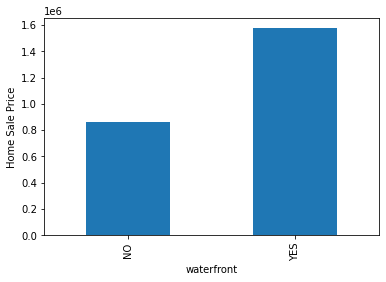

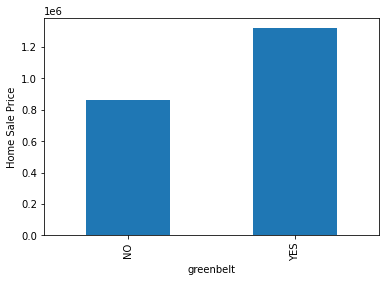

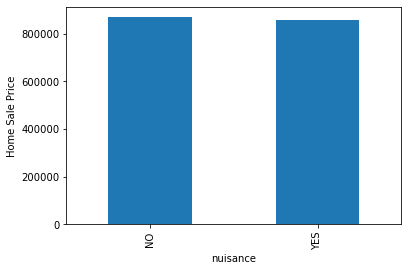

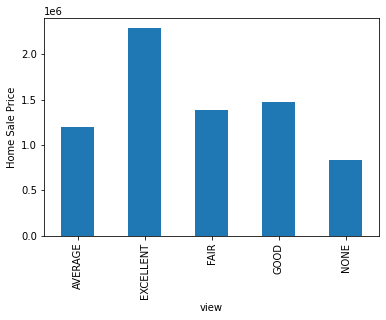

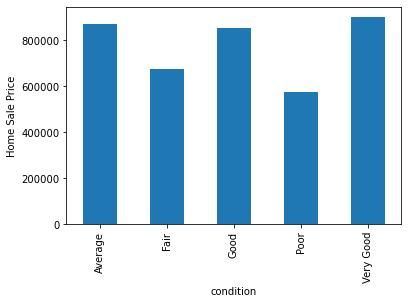

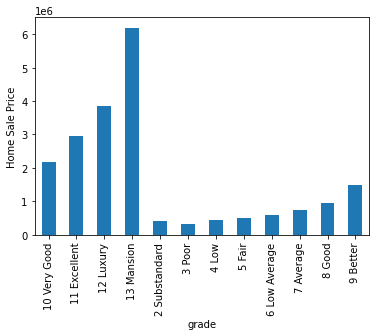

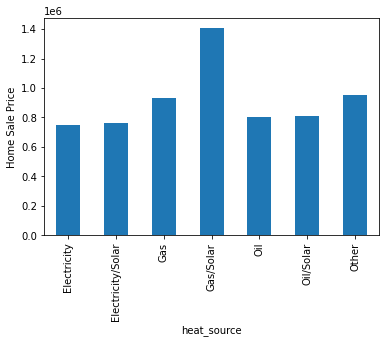

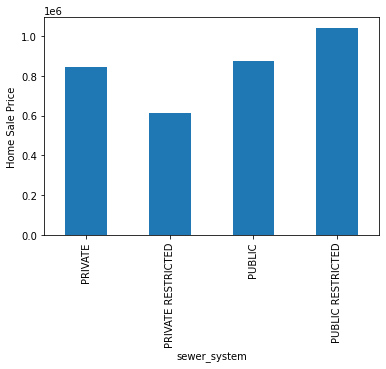

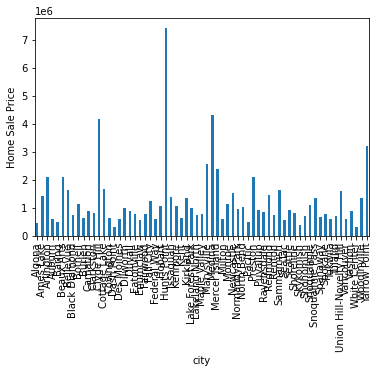

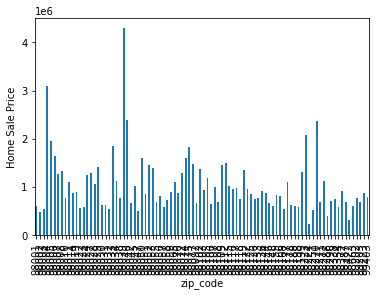

In [99]:
for feature in cate_features:
    data=wa_only_df.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Home Sale Price')
    plt.show()

In [100]:
# removing more columns that we will not be using in analysis
wa_only_df = wa_only_df.drop(columns=['sqft_lot', 'nuisance', 'greenbelt', 'heat_source', 'sewer_system'])
wa_only_df

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,zip_code
0,2022-05-24,675000.00,4,1.00,1180,1.00,NO,NONE,Good,7 Average,1180,0,0,40,Renton,98055
1,2021-12-13,920000.00,5,2.50,2770,1.00,NO,AVERAGE,Average,7 Average,1570,1570,0,240,Seattle,98133
2,2021-09-29,311000.00,6,2.00,2880,1.00,NO,AVERAGE,Average,7 Average,1580,1580,0,0,Seattle,98178
3,2021-12-14,775000.00,3,3.00,2160,2.00,NO,AVERAGE,Average,9 Better,1090,1070,200,270,Seattle,98118
4,2021-08-24,592500.00,2,2.00,1120,2.00,NO,NONE,Average,7 Average,1120,550,550,30,Issaquah,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,2021-11-30,1555000.00,5,2.00,1910,1.50,NO,NONE,Good,8 Good,1600,1130,0,210,Seattle,98103
30151,2021-06-16,1313000.00,3,2.00,2020,2.00,NO,FAIR,Average,7 Average,2020,0,0,520,Seattle,98116
30152,2022-05-27,800000.00,3,2.00,1620,1.00,NO,NONE,Average,7 Average,940,920,240,110,Seattle,98122
30153,2022-02-24,775000.00,3,2.50,2570,2.00,NO,NONE,Average,8 Good,1830,740,480,100,Renton,98055


We souced data with mortgage rates per month and will merge to our clean dataset so look for relationships between mortgage fluctuations and prices.

In [101]:
# importing mortgage dataset
mortg = pd.read_csv('../Data/monthy_mortgage_rates_cleaned.csv')
mortg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     279 non-null    int64  
 1   month          279 non-null    object 
 2   mortgage_rate  279 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.7+ KB


When loading, it looks like an additional column is now in the dataset that is not relevant to our analysis so it will be removed. The month column should contain Month and Year of the reported mortgage rate and additional formating will be needed to be able to merge it with clean dataset. 

In [102]:
# dropping extra column
mortg = mortg.drop(columns='Unnamed: 0')
mortg.head()

,month,mortgage_rate
0,January 2000,8.21
1,February 2000,8.32
2,March 2000,8.24
3,April 2000,8.15
4,May 2000,8.52


In [103]:
# formatting month column to datetime
mortg['month'] = pd.to_datetime(mortg['month'])

In [104]:
mortg.head()

,month,mortgage_rate
0,2000-01-01,8.21
1,2000-02-01,8.32
2,2000-03-01,8.24
3,2000-04-01,8.15
4,2000-05-01,8.52


In [105]:
#changing date to month and year
mortg['month'] = mortg['month'].dt.strftime('%B %Y')
mortg.head()

,month,mortgage_rate
0,January 2000,8.21
1,February 2000,8.32
2,March 2000,8.24
3,April 2000,8.15
4,May 2000,8.52


In [106]:
# copying cleaned king county dataset to merge with mortgage rates
sales_df = wa_only_df
sales_df.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,zip_code
0,2022-05-24,675000.00,4,1.00,1180,1.00,NO,NONE,Good,7 Average,1180,0,0,40,Renton,98055
1,2021-12-13,920000.00,5,2.50,2770,1.00,NO,AVERAGE,Average,7 Average,1570,1570,0,240,Seattle,98133
2,2021-09-29,311000.00,6,2.00,2880,1.00,NO,AVERAGE,Average,7 Average,1580,1580,0,0,Seattle,98178
3,2021-12-14,775000.00,3,3.00,2160,2.00,NO,AVERAGE,Average,9 Better,1090,1070,200,270,Seattle,98118
4,2021-08-24,592500.00,2,2.00,1120,2.00,NO,NONE,Average,7 Average,1120,550,550,30,Issaquah,98027


In [107]:
# changing format of date column to match before merge
sales_df['date'] = sales_df['date'].dt.strftime('%B %Y')
sales_df.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,zip_code
0,May 2022,675000.00,4,1.00,1180,1.00,NO,NONE,Good,7 Average,1180,0,0,40,Renton,98055
1,December 2021,920000.00,5,2.50,2770,1.00,NO,AVERAGE,Average,7 Average,1570,1570,0,240,Seattle,98133
2,September 2021,311000.00,6,2.00,2880,1.00,NO,AVERAGE,Average,7 Average,1580,1580,0,0,Seattle,98178
3,December 2021,775000.00,3,3.00,2160,2.00,NO,AVERAGE,Average,9 Better,1090,1070,200,270,Seattle,98118
4,August 2021,592500.00,2,2.00,1120,2.00,NO,NONE,Average,7 Average,1120,550,550,30,Issaquah,98027


In [108]:
# add mortgage_rate column from mortgage df to cleaned df based on the condition if date=month
sales_df['mortgage_rate'] = sales_df.apply(lambda x: mortg.loc[mortg['month'] == x['date'],
                                                               'mortgage_rate'].values[0] 
                                           if mortg['month'].isin([x['date']]).any() 
                                           else 
                                               None, axis=1)

In [110]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29128 entries, 0 to 30154
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           29128 non-null  object 
 1   price          29128 non-null  float64
 2   bedrooms       29128 non-null  int64  
 3   bathrooms      29128 non-null  float64
 4   sqft_living    29128 non-null  int64  
 5   floors         29128 non-null  float64
 6   waterfront     29128 non-null  object 
 7   view           29128 non-null  object 
 8   condition      29128 non-null  object 
 9   grade          29128 non-null  object 
 10  sqft_above     29128 non-null  int64  
 11  sqft_basement  29128 non-null  int64  
 12  sqft_garage    29128 non-null  int64  
 13  sqft_patio     29128 non-null  int64  
 14  city           29128 non-null  object 
 15  zip_code       29128 non-null  object 
 16  mortgage_rate  29128 non-null  float64
dtypes: float64(4), int64(6), object(7)
memory usage: 4

<AxesSubplot:>

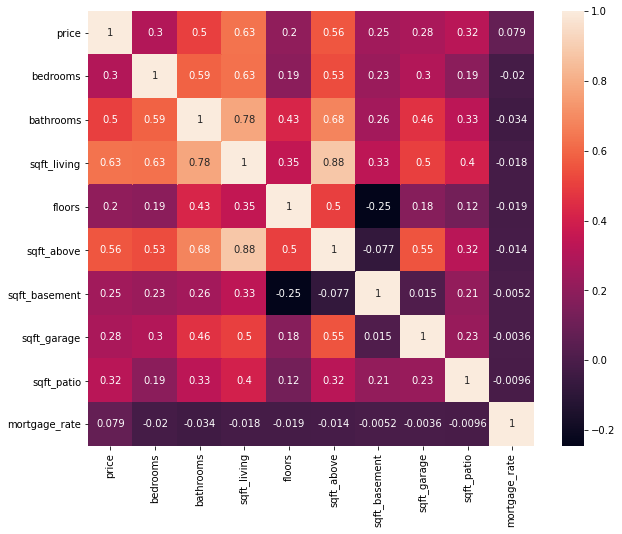

In [111]:
# looking at correlations
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(sales_df.corr(), annot=True)

<AxesSubplot:xlabel='mortgage_rate', ylabel='price'>

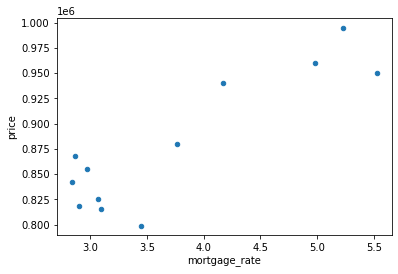

In [126]:
sales_df.groupby('mortgage_rate', as_index = False)['price'].median().plot.scatter(x='mortgage_rate', y='price')

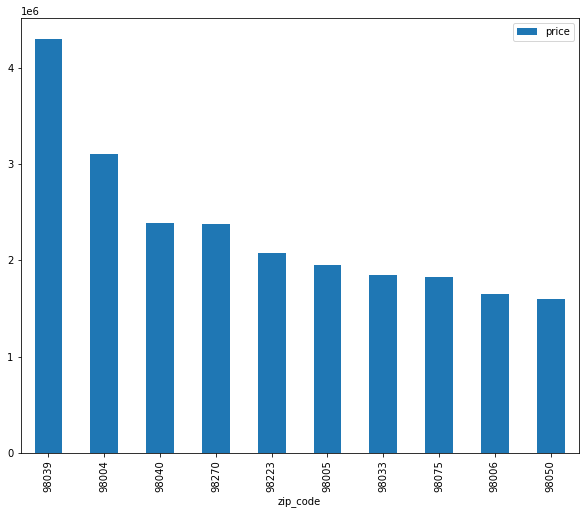

In [127]:
zip_group = sales_df.groupby('zip_code')['price'].median().sort_values(ascending=False)
top_zip = pd.DataFrame(zip_group.head(10))
top_zip.plot(kind='bar', figsize=(10,8));

The zipcode with the highest median price is Media, WA. 

## Data Modeling

### Simple Regression
For our simple regression model, we will be using sqft_living as it was the most correlated to our target.

In [148]:
# simple model
Y = sales_df['price']
X = sm.add_constant(sales_df['sqft_living'])

wa_simple = sm.OLS(endog=Y, exog=X).fit()
wa_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 1.951e+04
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:56:30   Log-Likelihood:            -4.3242e+05
No. Observations:               29128   AIC:                         8.648e+05
Df Residuals:                   29126   BIC:                         8.649e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.038e+05   9568.210    -10.851      0.000   -1.23e+05   -8.51e+04
sqft_living   569.3739      4.076    139.694      0.000     561.385     577.363
==============================================================================
Omnibus:                    35190.959   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13551393.547
Skew:                           6.082   Prob(JB):                         0.00
Kurtosis:                     107.965   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

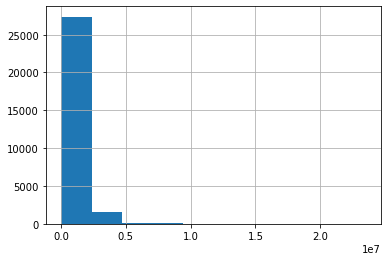

In [149]:
# looking at target distribution
Y.hist();

Our target is slightly right skewed, we will see how taking the log affects the distribution and model.

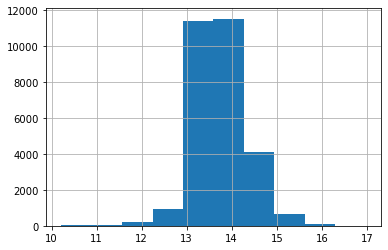

In [150]:
Y_log = np.log(Y)
Y_log.hist();

In [151]:
wa_simple_log = sm.OLS(endog=Y_log, exog=X).fit()
wa_simple_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                 1.885e+04
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:56:41   Log-Likelihood:                -18428.
No. Observations:               29128   AIC:                         3.686e+04
Df Residuals:                   29126   BIC:                         3.688e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9355      0.006   2011.153      0.000      12.923      12.948
sqft_living     0.0004   2.74e-06    137.278      0.000       0.000       0.000
==============================================================================
Omnibus:                     5967.618   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43956.560
Skew:                          -0.792   Prob(JB):                         0.00
Kurtosis:                       8.806   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There does not seem to be any improvement in the model after the log.

### Multiple Numerical Regression

In [152]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29128 entries, 0 to 30154
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           29128 non-null  object 
 1   price          29128 non-null  float64
 2   bedrooms       29128 non-null  int64  
 3   bathrooms      29128 non-null  float64
 4   sqft_living    29128 non-null  int64  
 5   floors         29128 non-null  float64
 6   waterfront     29128 non-null  object 
 7   view           29128 non-null  object 
 8   condition      29128 non-null  object 
 9   grade          29128 non-null  object 
 10  sqft_above     29128 non-null  int64  
 11  sqft_basement  29128 non-null  int64  
 12  sqft_garage    29128 non-null  int64  
 13  sqft_patio     29128 non-null  int64  
 14  city           29128 non-null  object 
 15  zip_code       29128 non-null  object 
 16  mortgage_rate  29128 non-null  float64
dtypes: float64(4), int64(6), object(7)
memory usage: 4

In [165]:
# creating new dataframe with numeric colums
numeric_df = sales_df.select_dtypes(include=['float','int64'])
numeric_df

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,mortgage_rate
0,675000.00,4,1.00,1180,1.00,1180,0,0,40,5.23
1,920000.00,5,2.50,2770,1.00,1570,1570,0,240,3.10
2,311000.00,6,2.00,2880,1.00,1580,1580,0,0,2.90
3,775000.00,3,3.00,2160,2.00,1090,1070,200,270,3.10
4,592500.00,2,2.00,1120,2.00,1120,550,550,30,2.84
...,...,...,...,...,...,...,...,...,...,...
30150,1555000.00,5,2.00,1910,1.50,1600,1130,0,210,3.07
30151,1313000.00,3,2.00,2020,2.00,2020,0,0,520,2.98
30152,800000.00,3,2.00,1620,1.00,940,920,240,110,5.23
30153,775000.00,3,2.50,2570,2.00,1830,740,480,100,3.76


In [166]:
numeric_df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,mortgage_rate
count,29128.00,29128.00,29128.00,29128.00,29128.00,29128.00,29128.00,29128.00,29128.00,29128.00
mean,1112255.98,3.44,2.34,2135.83,1.52,1829.81,482.37,337.22,216.77,3.52
std,875762.28,0.97,0.89,974.24,0.55,878.43,586.41,286.02,246.82,0.85
min,27360.00,0.00,0.00,510.00,1.00,300.00,0.00,0.00,0.00,2.84
25%,645000.00,3.00,2.00,1440.00,1.00,1190.00,0.00,0.00,40.00,2.90
50%,869000.00,3.00,2.50,1950.00,1.50,1580.00,0.00,400.00,150.00,3.07
75%,1310250.00,4.00,3.00,2640.00,2.00,2294.00,960.00,520.00,310.00,4.17
max,23500000.00,13.00,10.50,15360.00,4.00,12660.00,8020.00,3580.00,4370.00,5.52


In [198]:
# separting data frame into model variables
num_mlr_y = numeric_df['price']
num_mlr_x = numeric_df.drop('price', axis=1)
num_mlr_x.head()

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,mortgage_rate
0,4,1.00,1180,1.00,1180,0,0,40,5.23
1,5,2.50,2770,1.00,1570,1570,0,240,3.10
2,6,2.00,2880,1.00,1580,1580,0,0,2.90
3,3,3.00,2160,2.00,1090,1070,200,270,3.10
4,2,2.00,1120,2.00,1120,550,550,30,2.84


In [200]:
# multiple regression model on numeric variables
num_mlr = sm.OLS(endog=num_mlr_y, exog=sm.add_constant(num_mlr_x)).fit()
num_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     2567.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:31:34   Log-Likelihood:            -4.3138e+05
No. Observations:               29128   AIC:                         8.628e+05
Df Residuals:                   29118   BIC:                         8.629e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.519e+05   2.37e+04     -6.414      0.000   -1.98e+05   -1.05e+05
bedrooms      -1.491e+05   5254.222    -28.368      0.000   -1.59e+05   -1.39e+05
bathrooms      1.034e+05   7507.004     13.775      0.000    8.87e+04    1.18e+05
sqft_living     287.5729     17.393     16.534      0.000     253.482     321.664
floors        -9.665e+04   8902.295    -10.856      0.000   -1.14e+05   -7.92e+04
sqft_above      368.7033     17.583     20.969      0.000     334.239     403.168
sqft_basement   235.6980     12.619     18.678      0.000     210.964     260.432
sqft_garage    -290.0572     16.605    -17.468      0.000    -322.604    -257.510
sqft_patio      235.8452     17.171     13.735      0.000     202.188     269.502
mortgage_rate  9.272e+04   4516.263     20.531      0.000    8.39e+04    1.02e+05
==============================================================================
Omnibus:                    34689.307   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13497980.360
Skew:                           5.909   Prob(JB):                         0.00
Kurtosis:                     107.795   Cond. No.                     2.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Above was the basic numeric model, we will log our target and scale numeric features to check for improvement.

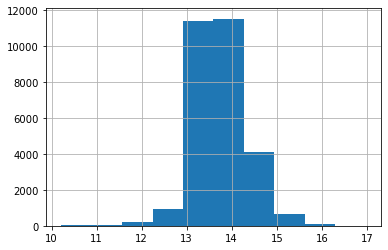

In [201]:
# log of target for second model transformation
num_mlr_y_log = np.log(num_mlr_y)
num_mlr_y_log.hist();

In [210]:
num_mlr_x

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,mortgage_rate
0,4,1.00,1180,1.00,1180,0,0,40,5.23
1,5,2.50,2770,1.00,1570,1570,0,240,3.10
2,6,2.00,2880,1.00,1580,1580,0,0,2.90
3,3,3.00,2160,2.00,1090,1070,200,270,3.10
4,2,2.00,1120,2.00,1120,550,550,30,2.84
...,...,...,...,...,...,...,...,...,...
30150,5,2.00,1910,1.50,1600,1130,0,210,3.07
30151,3,2.00,2020,2.00,2020,0,0,520,2.98
30152,3,2.00,1620,1.00,940,920,240,110,5.23
30153,3,2.50,2570,2.00,1830,740,480,100,3.76


In [211]:
# scaling x
num_mlr_x_sld = (num_mlr_x - np.mean(num_mlr_x)) / np.std(num_mlr_x)
num_mlr_x_sld

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,mortgage_rate
0,0.57,-1.50,-0.98,-0.94,-0.74,-0.82,-1.18,-0.72,2.01
1,1.61,0.18,0.65,-0.94,-0.30,1.85,-1.18,0.09,-0.50
2,2.64,-0.38,0.76,-0.94,-0.28,1.87,-1.18,-0.88,-0.73
3,-0.46,0.74,0.02,0.88,-0.84,1.00,-0.48,0.22,-0.50
4,-1.49,-0.38,-1.04,0.88,-0.81,0.12,0.74,-0.76,-0.80
...,...,...,...,...,...,...,...,...,...
30150,1.61,-0.38,-0.23,-0.03,-0.26,1.10,-1.18,-0.03,-0.54
30151,-0.46,-0.38,-0.12,0.88,0.22,-0.82,-1.18,1.23,-0.64
30152,-0.46,-0.38,-0.53,-0.94,-1.01,0.75,-0.34,-0.43,2.01
30153,-0.46,0.18,0.45,0.88,0.00,0.44,0.50,-0.47,0.28


In [212]:
# log y and scaled x
predictors = sm.add_constant(num_mlr_x_sld)
num_mlr_scld= sm.OLS(endog=num_mlr_y_log, exog=predictors).fit()
num_mlr_scld.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     2411.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:36:24   Log-Likelihood:                -17585.
No. Observations:               29128   AIC:                         3.519e+04
Df Residuals:                   29118   BIC:                         3.527e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.7388      0.003   5297.523      0.000      13.734      13.744
bedrooms         -0.0493      0.003    -14.306      0.000      -0.056      -0.043
bathrooms         0.0675      0.005     14.884      0.000       0.059       0.076
sqft_living       0.1766      0.011     15.400      0.000       0.154       0.199
floors            0.0140      0.003      4.233      0.000       0.008       0.020
sqft_above        0.1569      0.010     15.014      0.000       0.136       0.177
sqft_basement     0.0901      0.005     17.982      0.000       0.080       0.100
sqft_garage      -0.0359      0.003    -11.175      0.000      -0.042      -0.030
sqft_patio        0.0350      0.003     12.218      0.000       0.029       0.041
mortgage_rate     0.0706      0.003     27.187      0.000       0.065       0.076
==============================================================================
Omnibus:                     6711.185   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54126.675
Skew:                          -0.887   Prob(JB):                         0.00
Kurtosis:                       9.438   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model Adjusted R 

### Categorical Features Models

In [327]:
# dropping columns before categorical model
dummy_sales_df = dummy_sales_df.drop(columns=['date', 'city', 'sqft_garage', 'sqft_above'])

In [489]:
dummy_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29016 entries, 0 to 30154
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29016 non-null  float64
 1   bedrooms       29016 non-null  int64  
 2   bathrooms      29016 non-null  float64
 3   sqft_living    29016 non-null  int64  
 4   floors         29016 non-null  float64
 5   waterfront     29016 non-null  object 
 6   view           29016 non-null  object 
 7   condition      29016 non-null  object 
 8   grade          29016 non-null  object 
 9   sqft_basement  29016 non-null  int64  
 10  sqft_patio     29016 non-null  int64  
 11  zip_code       29016 non-null  object 
 12  mortgage_rate  29016 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 3.1+ MB


In [491]:
dummy_sales_df = dummy_sales_df.loc[(dummy_sales_df['price'] < 10000000) &
                                    (dummy_sales_df['price'] > 100000)]
dummy_sales_df
                                    

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,sqft_patio,zip_code,mortgage_rate
0,675000.00,4,1.00,1180,1.00,NO,NONE,Good,7 Average,0,40,98055,5.23
1,920000.00,5,2.50,2770,1.00,NO,AVERAGE,Average,7 Average,1570,240,98133,3.10
2,311000.00,6,2.00,2880,1.00,NO,AVERAGE,Average,7 Average,1580,0,98178,2.90
3,775000.00,3,3.00,2160,2.00,NO,AVERAGE,Average,9 Better,1070,270,98118,3.10
4,592500.00,2,2.00,1120,2.00,NO,NONE,Average,7 Average,550,30,98027,2.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.00,5,2.00,1910,1.50,NO,NONE,Good,8 Good,1130,210,98103,3.07
30151,1313000.00,3,2.00,2020,2.00,NO,FAIR,Average,7 Average,0,520,98116,2.98
30152,800000.00,3,2.00,1620,1.00,NO,NONE,Average,7 Average,920,110,98122,5.23
30153,775000.00,3,2.50,2570,2.00,NO,NONE,Average,8 Good,740,100,98055,3.76


In [334]:
cat_dummies = pd.get_dummies(dummy_sales_df, drop_first=True)
cat_dummies

,price,bedrooms,bathrooms,sqft_living,floors,sqft_basement,sqft_patio,mortgage_rate,waterfront_YES,view_EXCELLENT,...,zip_code_98338,zip_code_98354,zip_code_98372,zip_code_98387,zip_code_98422,zip_code_98663,zip_code_99202,zip_code_99203,zip_code_99223,zip_code_99403
0,675000.00,4,1.00,1180,1.00,0,40,5.23,0,0,...,0,0,0,0,0,0,0,0,0,0
1,920000.00,5,2.50,2770,1.00,1570,240,3.10,0,0,...,0,0,0,0,0,0,0,0,0,0
2,311000.00,6,2.00,2880,1.00,1580,0,2.90,0,0,...,0,0,0,0,0,0,0,0,0,0
3,775000.00,3,3.00,2160,2.00,1070,270,3.10,0,0,...,0,0,0,0,0,0,0,0,0,0
4,592500.00,2,2.00,1120,2.00,550,30,2.84,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.00,5,2.00,1910,1.50,1130,210,3.07,0,0,...,0,0,0,0,0,0,0,0,0,0
30151,1313000.00,3,2.00,2020,2.00,0,520,2.98,0,0,...,0,0,0,0,0,0,0,0,0,0
30152,800000.00,3,2.00,1620,1.00,920,110,5.23,0,0,...,0,0,0,0,0,0,0,0,0,0
30153,775000.00,3,2.50,2570,2.00,740,100,3.76,0,0,...,0,0,0,0,0,0,0,0,0,0


In [309]:
# water dummy, drops NO
# view dummy, drops AVERAGE
# condition dummy, drops AVERAGE
# grade dummy, drops 10 Very Good
# zip dummy, drops 98001

In [335]:
# categorical model 1 - before log and scale
y = cat_dummies['price']
x = cat_dummies.drop('price', axis=1)
cat_model = sm.OLS(endog=y, exog=sm.add_constant(x)).fit()
print(cat_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     728.3
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:55:12   Log-Likelihood:            -4.1512e+05
No. Observations:               29016   AIC:                         8.305e+05
Df Residuals:                   28897   BIC:                         8.315e+05
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.268e+05   2

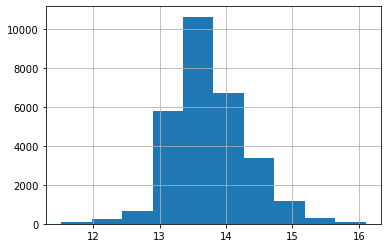

In [336]:
y_log = np.log(y)
y_log.hist();

In [337]:
x_sld = (x - np.mean(x)) / np.std(x)
x_sld

,bedrooms,bathrooms,sqft_living,floors,sqft_basement,sqft_patio,mortgage_rate,waterfront_YES,view_EXCELLENT,view_FAIR,...,zip_code_98338,zip_code_98354,zip_code_98372,zip_code_98387,zip_code_98422,zip_code_98663,zip_code_99202,zip_code_99203,zip_code_99223,zip_code_99403
0,0.58,-1.50,-0.99,-0.94,-0.83,-0.72,2.01,-0.13,-0.14,-0.09,...,-0.01,-0.03,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
1,1.61,0.19,0.66,-0.94,1.87,0.10,-0.50,-0.13,-0.14,-0.09,...,-0.01,-0.03,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
2,2.64,-0.38,0.77,-0.94,1.88,-0.88,-0.73,-0.13,-0.14,-0.09,...,-0.01,-0.03,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
3,-0.46,0.75,0.03,0.88,1.01,0.22,-0.50,-0.13,-0.14,-0.09,...,-0.01,-0.03,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
4,-1.49,-0.38,-1.05,0.88,0.12,-0.76,-0.80,-0.13,-0.14,-0.09,...,-0.01,-0.03,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1.61,-0.38,-0.23,-0.03,1.11,-0.03,-0.54,-0.13,-0.14,-0.09,...,-0.01,-0.03,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
30151,-0.46,-0.38,-0.12,0.88,-0.83,1.24,-0.65,-0.13,-0.14,11.60,...,-0.01,-0.03,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
30152,-0.46,-0.38,-0.53,-0.94,0.75,-0.43,2.01,-0.13,-0.14,-0.09,...,-0.01,-0.03,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
30153,-0.46,0.19,0.45,0.88,0.44,-0.47,0.28,-0.13,-0.14,-0.09,...,-0.01,-0.03,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01


In [340]:
# final: categorical  model 2 - ylog and xscaled
preds = sm.add_constant(x_sld)
updated_model = sm.OLS(endog=y_log, exog=preds).fit()
print(updated_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     755.0
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:55:29   Log-Likelihood:                -3971.8
No. Observations:               29016   AIC:                             8182.
Df Residuals:                   28897   BIC:                             9166.
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.7449    

Our final model seems to have improved with an adjusted R-Square of 0.75 and a cond. number of 13.4.

In [404]:
# most positive coef
coef = updated_model.params.sort_values(ascending=False).reset_index()
coef_df = pd.DataFrame(coef)
coef_df.head(10)

,index,0
0,const,13.74
1,sqft_living,0.20
2,zip_code_98033,0.14
3,zip_code_98004,0.12
4,zip_code_98052,0.11
5,zip_code_98115,0.11
6,zip_code_98103,0.10
7,zip_code_98117,0.10
8,zip_code_98034,0.10
9,zip_code_98006,0.10


In [407]:
# most negative coef
coef_df.tail(10)

,index,0
109,zip_code_98002,-0.01
110,grade_4 Low,-0.02
111,grade_9 Better,-0.02
112,floors,-0.02
113,sqft_basement,-0.03
114,view_NONE,-0.03
115,grade_5 Fair,-0.05
116,grade_8 Good,-0.09
117,grade_6 Low Average,-0.11
118,grade_7 Average,-0.14


In [513]:
##looking at outliers

y_4 = cat_dummies['price']

#finding outliers using 1.5 IQR

Q1 = np.percentile(y_4, 25)

Q3 = np.percentile(y_4, 75)

#IQR formula
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR

upper_limit = Q3 + 1.5 * IQR

print(lower_limit)
print(upper_limit)

-342442.5
2304065.5


## Evaluation

### Linearity Check

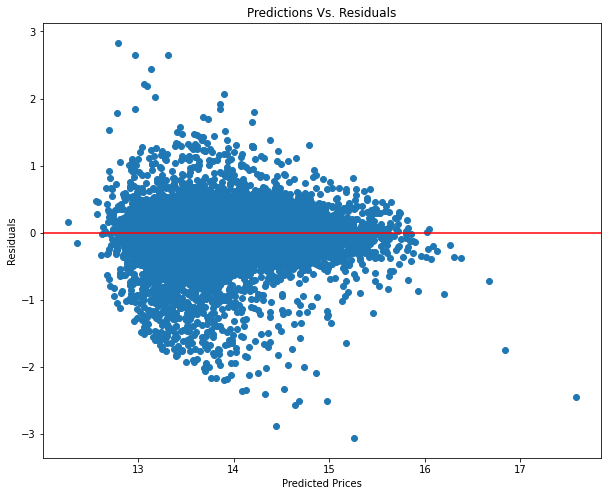

In [365]:
model_preds = updated_model.predict(preds)
# residuals - error (diff. from real points (y_log) to predict points (preds))
reds = y_log - model_preds

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(model_preds, reds)
ax.set_xlabel('Predicted Prices')
ax.set_ylabel('Residuals')
ax.set_title('Predictions Vs. Residuals')
plt.axhline(y=0.0, color='r', linestyle='-');

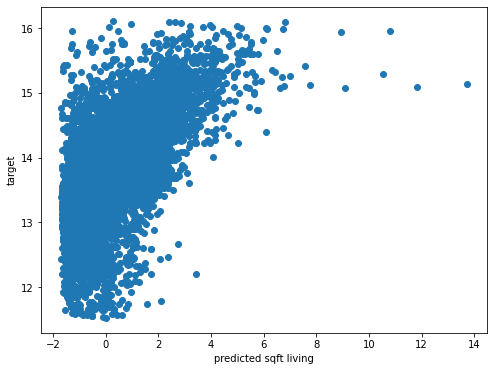

In [466]:
# target vs 1 predictor
fig, ax = plt.subplots( figsize=(8,6))
ax.scatter(preds['sqft_living'], y_log)
ax.set_xlabel('predicted sqft living')
ax.set_ylabel('target');

### Independence Check

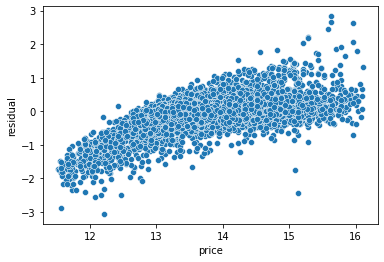

In [367]:
# scatterplot
sns.scatterplot(y=reds, x=y_log);
plt.ylabel('residual');

In [346]:
# db test
dw = sm.stats.stattools.durbin_watson
dw(reds)

1.9555138367703742

Very small positive correlation

### Normality Check

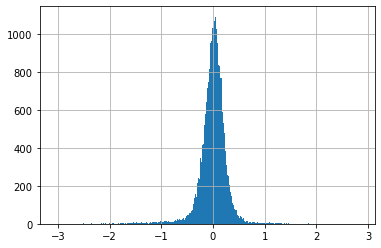

In [347]:
reds.hist(bins='auto');

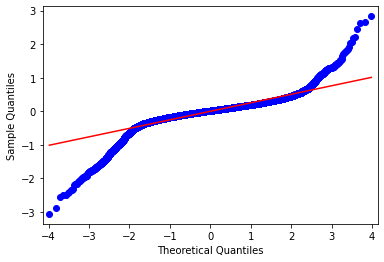

In [348]:
sm.qqplot(data=reds, line='r');

In [349]:
updated_model.summary().tables[2]

Omnibus:,11556.637,Durbin-Watson:,1.956
Prob(Omnibus):,0.000,Jarque-Bera (JB):,239198.445
Skew:,-1.412,Prob(JB):,0.00
Kurtosis:,16.779,Cond. No.,13.4


### Homoskedasticity Check

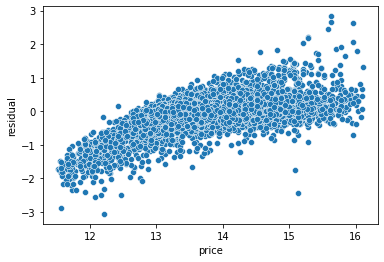

In [350]:
sns.scatterplot(x=y_log, y=reds)
plt.ylabel('residual');

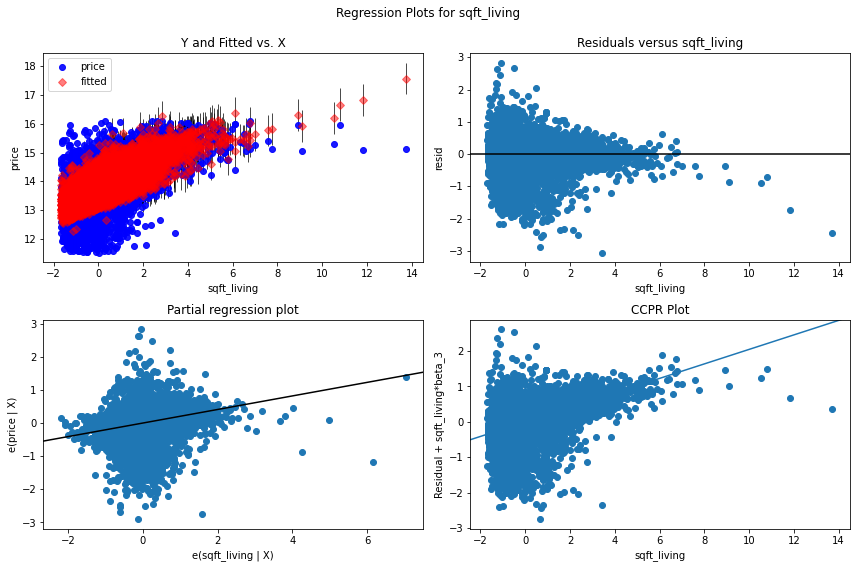

In [356]:
sm.graphics.plot_regress_exog(updated_model, 'sqft_living', fig=plt.figure(figsize=(12, 8)));

In [623]:
# model coefficient and std of numeric feature
updated_model.params.sqft_living, np.std(dummy_sales_df['sqft_living'])

# calculating impact of sqft_living coefficient on price
print(f"""
A one-unit increase in the square footage or approximately 
{round(np.std(dummy_sales_df['sqft_living'])
, 1)} squared feet, corresponds
to an increase in price by a factor of {round(np.exp(updated_model.params.sqft_living), 4)},
or {100 * round(np.exp(updated_model.params.sqft_living) - 1, 4)}%.
""")


A one-unit increase in the square footage or approximately 
964.0 squared feet, corresponds
to an increase in price by a factor of 1.227,
or 22.7%.



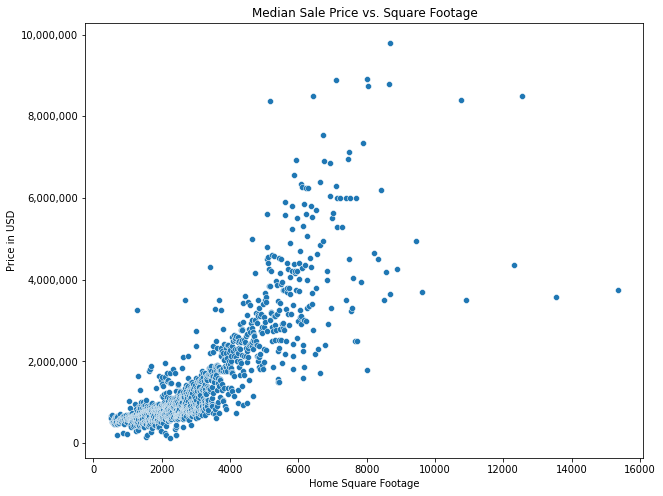

In [618]:
# grouping zip codes and getting median price 
size_df = dummy_sales_df.groupby('sqft_living', as_index=False).median()

# visualization of the relationship between zip code and sale price
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y=size_df['price'], x=size_df['sqft_living'])
plt.xlabel('Home Square Footage')
plt.ylabel('Price in USD')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title('Median Sale Price vs. Square Footage')
plt.savefig('../Images/Median Price per Sq Ft.png', dpi=300)


In [620]:
updated_model.params.zip_code_98002

# calculating impact of zipcode 98002 to price when comparing to 98001
print(f"""
From our base zip code to 98002 or Auburn, we see
a price change by a factor of {round(np.exp(updated_model.params.zip_code_98002), 4)},
or {100 * round(np.exp(updated_model.params.zip_code_98002) - 1, 4)}%.
""")

updated_model.params.zip_code_98033

# calculating impact of zipcode 98033 to price when comparing to 98001
print(f"""
From our base zip code to 98033 or Kirkland, we see
a price change by a factor of {round(np.exp(updated_model.params.zip_code_98033), 4)},
or {100 * round(np.exp(updated_model.params.zip_code_98033) - 1, 4)}%.
""")


From our base zip code to 98002 or Auburn, we see
a price change by a factor of 0.9896,
or -1.04%.


From our base zip code to 98033 or Kirkland, we see
a price change by a factor of 1.1453,
or 14.530000000000001%.



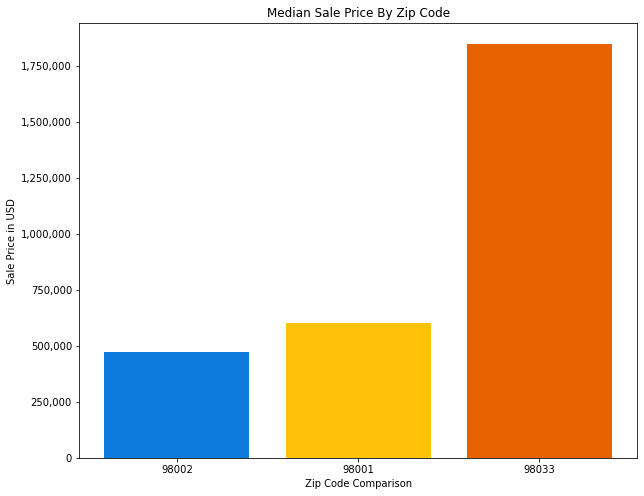

In [622]:
# creating df of meadian prices to plot 
zip_df = dummy_sales_df.loc[(dummy_sales_df['zip_code'] == '98001')|
                            (dummy_sales_df['zip_code'] == '98033') |
                            (dummy_sales_df['zip_code'] == '98002')]
zip_group = zip_df.groupby('zip_code', as_index=False).median().sort_values(by='price')

# median price vs zip code
color = ['#0C7BDC', '#FFC20A','#E66100'] 
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(height=zip_group['price'], x=zip_group['zip_code'], color = color)
ax.set_xlabel('Zip Code Comparison')
ax.set_ylabel('Sale Price in USD')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_title('Median Sale Price By Zip Code')
plt.savefig('../Images/zip_code.png', dpi=300);

In [617]:

# calculating impact of changing construction grade to 7 to price when comparing to
# grade 10   
print(f"""
From our base construction grade of 10 (very good) to 7 (average), we see
a price change by a factor of {round(np.exp( -0.1428), 4)},
or {100 * round(np.exp( -0.1428) - 1, 4)}%.
""") 



From our base construction grade of 10 (very good) to 7 (average), we see
a price change by a factor of 0.8669,
or -13.309999999999999%.



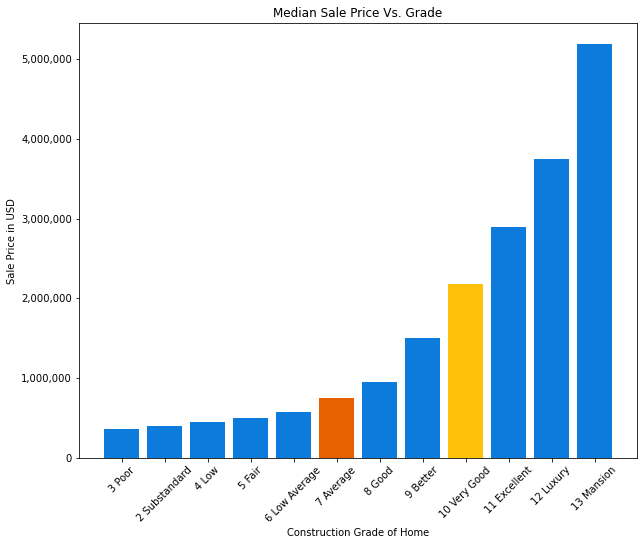

In [621]:
# # creating df of meadian prices to plot 
grades = dummy_sales_df.groupby('grade', as_index=False).median().sort_values(by='price')

# plot of median price vs grade
colors = ['#0C7BDC', '#0C7BDC','#0C7BDC','#0C7BDC','#0C7BDC','#E66100','#0C7BDC','#0C7BDC',
          '#FFC20A','#0C7BDC','#0C7BDC','#0C7BDC',] 
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(height=grades['price'], x=grades['grade'], color=colors)
ax.set_xlabel('Construction Grade of Home')
ax.set_ylabel('Sale Price in USD')
ax.set_title('Median Sale Price Vs. Grade')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45);
plt.savefig('../Images/Median Price per grade.png', dpi=300);

## Conclusions


As a result of this analysis, three variables have been identified that can impact prices and should be taken into consideration when researching potential investment properties:

**Home Size**

Increasing footage of home by approximately 964sq.ft increases the price by a factor of 1.227 or 22.7%.

**Location**

Comparing to our baseline zip code 98001 which corresponds to Federal Way city, moving to zip codes that are north and with more proximity to Seattle and more uban cities such as Kirkland (98033) increases the sale price by 22.7%.
Alternatively, staying close to Federal Way and away from Seattle, sale prices slightly decrease. As we can see by the comparison to zip code 98002 which corresponds to Auburn city which decreased price by 1.04% .

**Construction Grade**

We can see that construction grade quality can negatively affect prices. Lower construction quality is associated with a decrease in sale price, as we can see going from 10 to 7 decreases prices by 13.3%.

## Next Steps

To gain a more comprehensive understanding of changing home prices, it would be beneficial to analyze additional historical home sale data beyond the current dataset that only spans 18 months. Reviewing home sales over the past 5-10 years can provide insights into how the housing market has evolved.

In addition to historical data, conducting further analyses of environmental variables can enhance our understanding of residential home prices and should be taken into consideration. Some factors to consider include:

- School district ratings and locations
- Tax data
- Population data